In [1]:
# 1

########### 12 July 2021 ##########
######### Alec Hirschauer #########
#
# In this notebook, we will be testing the LAMPTAB files
# that were created for COS LP5 (G130M) and LP3 (G140L/c800)
# in the Notebook "COS_LP5_LP3_Lamp_Tabs_28June2021.ipynb",
# which have the file names
#
# LP5_G130M_fuv_28June2021_lamp.fits
# and
# LP3_G140L_fuv_28June2021_lamp.fits
#
# both of which are now stored in the directory
#
# /grp/hst/cos2/LP5_ERA/files_to_use
#
# We will compare them to the older LAMPTAB files,
# including the old LP4 data
#
# 2bj2256ol_lamp.fits
#
# and potentially the old LP3 data as well
#
# 52j2110ml_lamp.fits
#
# There are two basic tests for these reference files that I
# plan to pursue, both of which I intend to complete within
# this Notebook.
#
# First, check for removal of drift in corrtag file used to
# derive the final LAMPTAB.
#
# When shifts due to drift are removed from corrtag files,
# SHIFT_DISP value given in LAMPFLASH files derived from these
# corrtag files should be equal to fp_pixel_shift in LAMPTAB file.
#
# Second, check for internal consistency of fp_pixel_shift values
# within the LAMPTAB.
#
# Examine the difference in computed fp_pixel_shift values for
# interim minus final LAMPTAB values, and
#
# Compare residual differences between the data at each FP-POS
# after individial fp_pixel_shift_values have been subtracted.
#
# I've been asked to try making a plot of intensities for both
# the G140L/c800 and G130M/c1291/c1300/c1309/c1318/c1327 cenwaves
# in comparison with the LP4 data.
#
# This is a quick way to check if there's anything crazy going on.


In [2]:
# 2

# First thing needed is to import the relevant Python libraries:

import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import calcos
from astropy.io import fits
import glob

# I'm not actually sure how many of these are really relevant,
# but they're what I've used in the past, so I'll keep them now
# just in case.
#
# I'd rather have 'em and not need 'em than want 'em but not have 'em.
#
# UPDATE: The astroconda version of Jupyter doesn't like pandas,
# so I've commented that out.

# UPDATE: Nat Kerman's COS-Notebooks are a great guide for doing
# plotting of COS data, so I'm going to use this as a major reference
# for me, which includes copy+pasting the cell he uses to
# demonstrate what Python packages are necessary.
#
# A bunch will be duplicates, but I don't think that matters.

# This line causes matplotlib plots to appear in the Notebook 
# instead of possibly showing up in separate windows
%matplotlib inline

# Import for: Manipulating arrays
import numpy as np

# Import for: Managing system variables and paths
import sys 
import os
from pathlib import Path

# Imports for: Reading in data
from astropy.io import fits
from astropy.table import Table

# Import for: Plotting
import matplotlib.pyplot as plt

# Imports for: Dealing with units and plotting them
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

# Imports for: Downloading data from archive
from astroquery.mast import Mast
from astroquery.mast import Observations
from astroquery.mast import Catalogs


In [3]:
# 3

# Nat also includes a cell which suppresses warning text:

# Our arrays will encounter divide by 0 warnings, which is OK here, 
# but we want to suppress the warning text with the next code line.
   # DO NOT COPY the next line into your own code without careful consideration
    
np.warnings.filterwarnings('ignore')


In [4]:
# 4

# Next, Nat has a cell to define directories and colors:

# These will be important directories for the Notebook

datadir = Path('./data')
outputsdir = Path('./output/')
plotsdir = Path('./output/plots')
# Make the directories if they don't exist
datadir.mkdir(exist_ok=True), outputsdir.mkdir(exist_ok=True), plotsdir.mkdir(exist_ok=True)

# Specifying a few arbitrary colors to correspond to COS segments for plotting by their hex code
# Many search engines will show you the hex color - i.e. Google "#BC8C5B" to see this orange color
segment_colors = {'FUVA':'#BC8C5B', 'FUVB':'#4B6CA4', 
                  'NUVA':'#1813CE','NUVB':'#61946E','NUVC':'#8C1A11'}

# Since the data we're working on is *not* downloaded from MAST, but rather is just local,
# I think the directory definitions aren't relevant to this work, but the
# color scheming should help out with visualizations.

# UPDATE: I don't think I actually use any of this information later on...


In [5]:
# 5

# Second thing needed is to specify which files will be
# referenced once I start the testing.
#
# I alluded to these in the first Cell, but I'll be more
# explicit about them here.
#
# First, my new LAMPTAB files I made for this program:

lampdataLP5_G130M = 'LP5_G130M_fuv_28June2021_lamp.fits'
lampdataLP3_G140L = 'LP3_G140L_fuv_28June2021_lamp.fits'

# Next, the older, already-existing LAMPTAB files:

lampdataLP3_old = '52j2110ml_lamp.fits'
lampdataLP4_old = '2bj2256ol_lamp.fits'

# I *think* I'll be focusing the comparison work on the
# old LP4 data, but I used the LP3 data in the new file
# creation process, so I included it here just to be sure.


In [6]:
# 6

# As for actually plotting the COS data, I am turning to the
# COS-Notebooks reference tutorials put together by Nat Kerman
# to guide me.
#
# I've already copy+pasted some information from the "ViewData"
# COS-Notebook.
#
# To start, I'm simply going to make a line plot from the single
# segment of FUVA (without its error) for G140L/c800,
# since this doesn't have an FUVB segment anyway.
#
# First, I'll need to learn something about the files themselves

fuv_G140Lc800_data = Table.read('LP3_G140L_fuv_28June2021_lamp.fits')
columns_G140Lc800 = fuv_G140Lc800_data.colnames
# Print basic info about the table's columns
print("\n\nTable of new G140L/c800 FUV data with columns:\n",columns_G140Lc800, "\n\n")
# Display a representation of the data table:
#fuv_G140Lc800_data

fuv_lampdataLP4_old = Table.read('2bj2256ol_lamp.fits')
columns_lampdataLP4_old = fuv_lampdataLP4_old.columns
print("\n\nTable of old LP4 FUV data with columns:\n",columns_lampdataLP4_old, "\n\n")
#fuv_lampdataLP4_old




Table of new G140L/c800 FUV data with columns:
 ['SEGMENT', 'OPT_ELEM', 'CENWAVE', 'FPOFFSET', 'HAS_LINES', 'FP_PIXEL_SHIFT', 'INTENSITY'] 




Table of old LP4 FUV data with columns:
 <TableColumns names=('SEGMENT','OPT_ELEM','CENWAVE','FPOFFSET','HAS_LINES','FP_PIXEL_SHIFT','INTENSITY')> 




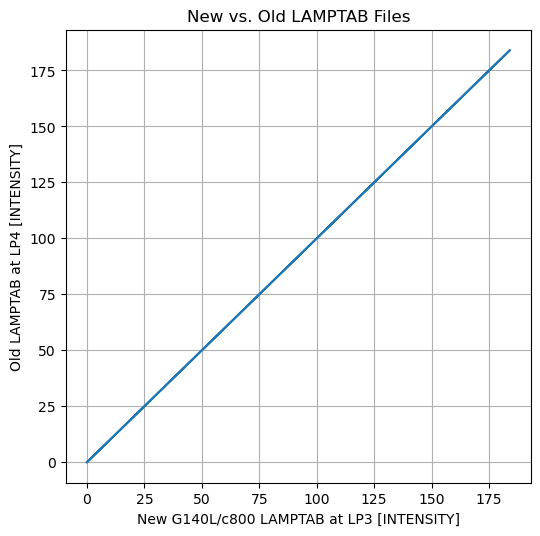

In [7]:
# 7

# Now that I have recovered the 'INTENSITY' columns from both the
# new LP3 LAMPTAB file (for G140L/c800) and the old LP4 LAMPTAB file,
# I can try plotting these against each other to see if they
# line up in a relatively one-to-one fashion.

new_intensity = fuv_G140Lc800_data[0]["INTENSITY"]
old_intensity = fuv_lampdataLP4_old[0]["INTENSITY"]

fig1, ax = plt.subplots(1,1,figsize=(6,6), dpi=100)
ax.plot(new_intensity, old_intensity)

ax.set_title("New vs. Old LAMPTAB Files")
ax.set_xlabel("New G140L/c800 LAMPTAB at LP3 [INTENSITY]")
ax.set_ylabel("Old LAMPTAB at LP4 [INTENSITY]")

plt.grid(True)
plt.show()
plt.close()
